<a href="https://colab.research.google.com/github/gabrielxcosta/Physics/blob/main/Computational%20Physics/Project_3_Runge_Kutta_and_Harmonic_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDO:
$$\frac{d^{2}x}{dt^{2}} + \omega^{2}x = 0$$

Portanto:

$$\ddot{x} = -\omega^{2} x$$

## Solução analítica:
$$x(t) = A\cos(\omega t) + B \sin(\omega t)$$

* Período: 10 oscilações
* Massa ($m$): $1 kg$
* Frequência Angular ($\omega$): $1 rad/s$

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

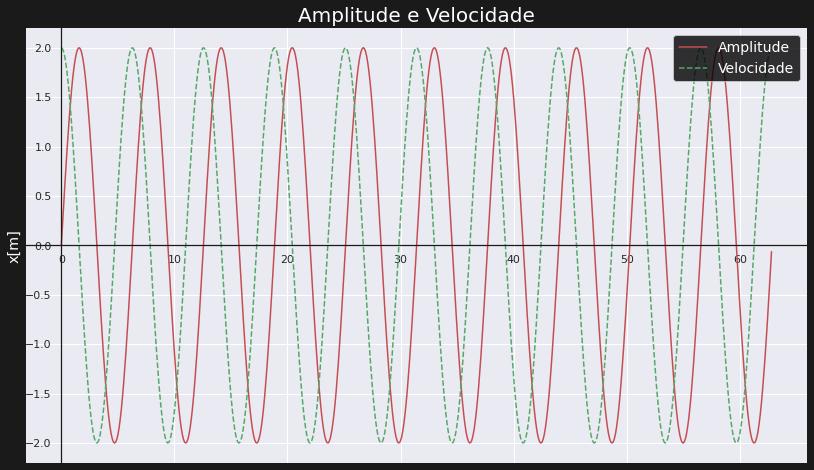

<Figure size 432x288 with 0 Axes>

In [ ]:
def Runge_Kutt4(y, dy, t, h):
  k1 = dy(y, t)
  k2 = dy(y + h / 2.0 * k1, t + h / 2.0)
  k3 = dy(y + h / 2.0 * k2, t + h / 2.0)
  k4 = dy(y + h * k3, t + h)
  y += h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
  t += h
  return (t, y)

def Harmonic_Oscillator_Deriv(y, t):
  omegasq = 1
  return np.array([y[1], -omegasq * y[0]])

def Sol_Analitica(t):
  A, B = 2.0, 2.0
  Solve = np.zeros(len(t))
  Solve = [A * np.cos(i) + B * np.sin(i) for i in t]
  return Solve

x0 = 0.0 # Posição inicial [m]
v0 = 2.0 # Velocidade inicial [m/s]
y = np.array([x0, v0])
t = 0 # Tempo inicial
h = 0.1 # Passo
tmax = 20 * np.pi # Onde acabar

# Armazenar todos os tempos e soluções
ts = np.array([t]) 
ys = np.array([y])

for i in range(int(tmax/h)): # Tomar os passos suficientes (ou perto)
  (t, y) = Runge_Kutt4(y, Harmonic_Oscillator_Deriv, t, h)
  ts = np.append(ts, t)
  ys = np.concatenate((ys, np.array([y])))

# Estilizando a plotagem
sns.set_theme()
plt.rcParams.update({'text.color': "white"})
plt.rcParams.update({'legend.facecolor': "black"})
plt.rcParams.update({'axes.labelcolor': "white"})
plt.rc('axes', edgecolor = 'k')

# Plots
[y1, y2] = ys.transpose()
fig, ax = plt.subplots(figsize = (14, 8), facecolor = 'k')
plt.title('Amplitude e Velocidade', size = 20)
plt.plot(ts, y1, 'r-', label = 'Amplitude')
plt.plot(ts, y2, 'g--', label = 'Velocidade')
plt.legend(fontsize = 14, loc = 'upper right', shadow = None)
plt.ylabel('x[m]', fontsize = 'large')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.show()
plt.savefig('Amplitude e Velocidade.png')

In [ ]:
dic = {'t' : ts, 'v(t)': y2} 
df = pd.DataFrame(dic)
df.reset_index(drop = True, inplace = True)
df.tail(150)

,t,v(t)
479,47.9,-1.427339
480,48.0,-1.280346
481,48.1,-1.120560
482,48.2,-0.949578
483,48.3,-0.769108
...,...,...
624,62.4,1.816332
625,62.5,1.890838
626,62.6,1.946452
627,62.7,1.982618


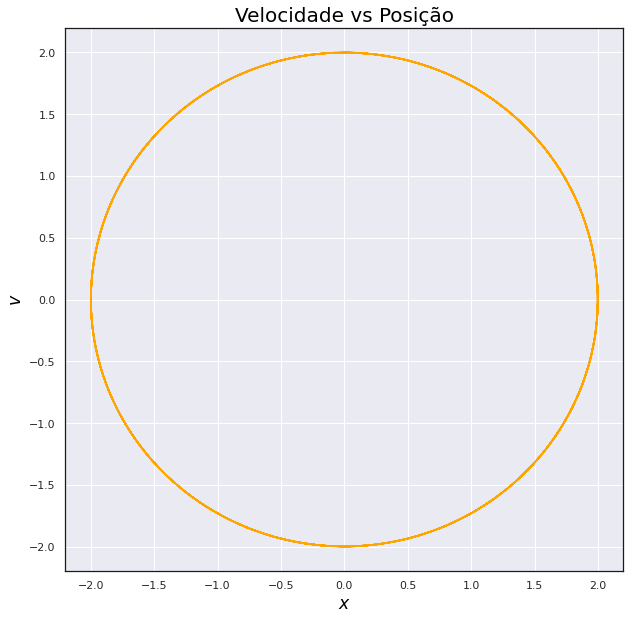

In [ ]:
sns.set_theme()
plt.rcParams.update({'text.color': "black"})
plt.rcParams.update({'legend.facecolor': "black"})
plt.rcParams.update({'axes.labelcolor': "black"})
plt.rc('axes', edgecolor = 'k')

fig, ax = plt.subplots(figsize = (10, 10), facecolor = 'white')
plt.title('Velocidade vs Posição', fontsize = 20)
plt.plot(y1, y2, 'orange')
plt.xlabel(r'$x$', fontsize = 'x-large')
plt.ylabel(r'$v$', fontsize = 'x-large')
plt.savefig('Velocidade vs Posição')

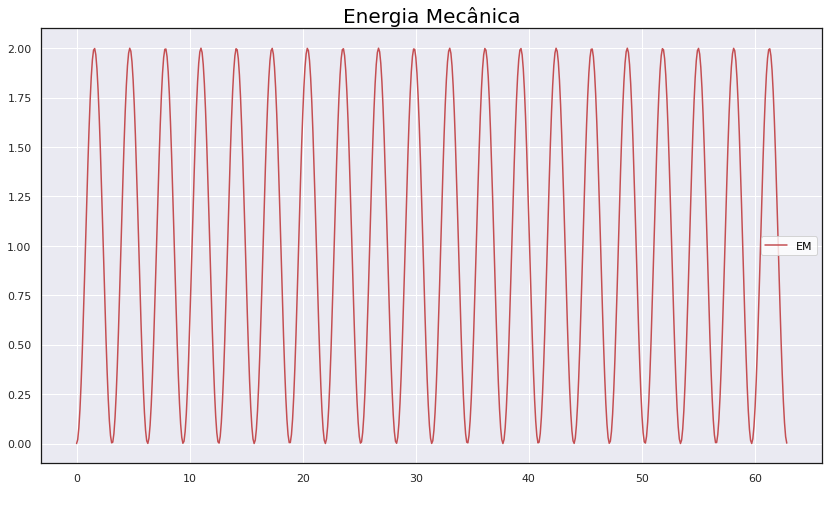

In [ ]:
def E_Mec(y, t):
  k = 1.0
  Res = np.zeros(len(t))
  for i in range(0, len(t)):
    Res[i] = 0.5 * k * ((y[i]) ** 2)
  return Res

# Estilizando a plotagem
sns.set_theme()
plt.rcParams.update({'text.color': "black"})
plt.rcParams.update({'legend.facecolor': "white"})
plt.rcParams.update({'axes.labelcolor': "white"})
plt.rc('axes', edgecolor = 'k')

Res = E_Mec(y1, ts)
fig, ax = plt.subplots(figsize = (14, 8), facecolor = 'white')
plt.xlabel(r"t[s]")
plt.title('Energia Mecânica', fontsize = 20)
plt.plot(ts, Res, 'r', label = 'EM')
plt.legend()
plt.savefig('EM')
plt.show()